<a href="https://colab.research.google.com/github/Piyaphat23/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

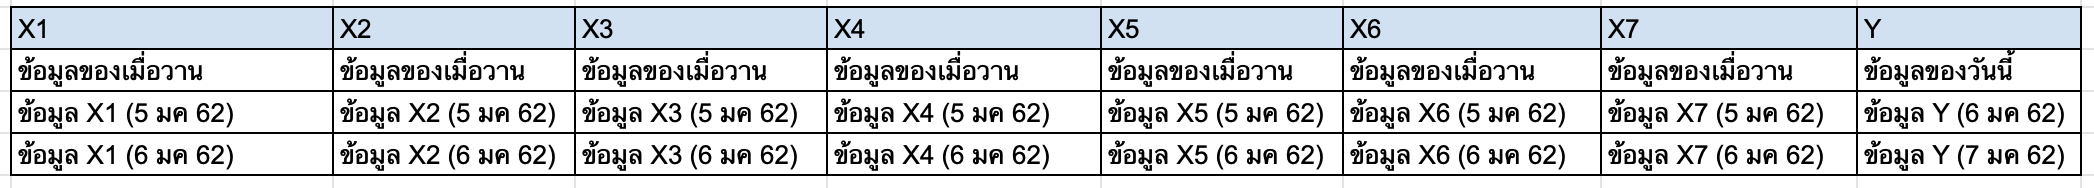

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

##เชื่อมDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##ข้อมูลความกดอากาศ 5 จังหวัด

In [ ]:
atmos_KK =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
atmos_KK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [ ]:
atmos_NP =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
atmos_SK =   pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
atmos_NK =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
atmos_Loei =  pd.read_excel("/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)

###เปลี่ยนชื่อColumn

In [ ]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [ ]:
atmos_KK = atmos_KK.rename(columns=column_name)
atmos_NP = atmos_NP.rename(columns=column_name)
atmos_SK = atmos_SK .rename(columns=column_name)
atmos_NK =atmos_NK .rename(columns=column_name)
atmos_Loei = atmos_Loei.rename(columns=column_name)


###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
atmos_KK  = atmos_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [ ]:
atmos_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [ ]:
atmos_NP  = atmos_NP.replace('-',np.NaN)

In [ ]:
atmos_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [ ]:
atmos_SK = atmos_SK.replace('-',np.NaN)

In [ ]:
atmos_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [ ]:
atmos_NK = atmos_NK.replace('-',np.NaN)

In [ ]:
atmos_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [ ]:
atmos_Loei= atmos_Loei.replace('-',np.NaN)

In [ ]:
atmos_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

ขอนแก่น

In [ ]:
for i in range(len(atmos_KK['ที่'])):atmos_KK.iloc[i,:]=atmos_KK.iloc[i,:].fillna(atmos_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [ ]:
atmos_KK.isnull().any() #เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [ ]:
atmos_KK.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


นครพนม

In [ ]:
for i in range(len(atmos_NP['ที่'])):atmos_NP.iloc[i,:]=atmos_NP.iloc[i,:].fillna(atmos_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [ ]:
atmos_NP.isnull().any() #เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [ ]:
atmos_NP.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1011.717000,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1009.749667,1010.608000


สกลนคร

In [ ]:
for i in range(len(atmos_SK['ที่'])):atmos_SK.iloc[i,:]=atmos_SK.iloc[i,:].fillna(atmos_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [ ]:
atmos_SK.isnull().any() #เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [ ]:
atmos_SK.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000


หนองคาย

In [ ]:
for i in range(len(atmos_NK['ที่'])):atmos_NK.iloc[i,:]=atmos_NK.iloc[i,:].fillna(atmos_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [ ]:
atmos_NK.isnull().any() #เรียกดูค่า Missing อีกรอบK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [ ]:
atmos_NK.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667


เลย

In [ ]:
for i in range(len(atmos_Loei['ที่'])):atmos_Loei.iloc[i,:]=atmos_Loei.iloc[i,:].fillna(atmos_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [ ]:
atmos_Loei.isnull().any() #เรียกดูค่า Missing อีกรอบK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [ ]:
atmos_Loei.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667


##ข้อมูลความชื้นสัมพัทธ์ 5 จังหวัด

In [ ]:
Hum_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Hum_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Hum_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Hum_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Hum_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [ ]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [ ]:
Hum_KK =Hum_KK.rename(columns=column_name)
Hum_NP = Hum_NP.rename(columns=column_name)
Hum_SK = Hum_SK .rename(columns=column_name)
Hum_NK =Hum_NK .rename(columns=column_name)
Hum_Loei = Hum_Loei.rename(columns=column_name)


###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [ ]:
Hum_KK =Hum_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [ ]:
Hum_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [ ]:
Hum_NP = Hum_NP.replace('-',np.NaN)

In [ ]:
Hum_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [ ]:
Hum_SK = Hum_SK.replace('-',np.NaN)

In [ ]:
Hum_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [62]:
Hum_NK = Hum_NK.replace('-',np.NaN)

In [63]:
Hum_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

In [64]:
Hum_Loei = Hum_Loei.replace('-',np.NaN)

In [65]:
Hum_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

มีค่า Missing อยู่ในวันที่ 29,30,31

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [66]:
for i in range(len(Hum_KK['ที่'])):Hum_KK.iloc[i,:]=Hum_KK.iloc[i,:].fillna(Hum_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [67]:
Hum_KK.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [68]:
for i in range(len(Hum_NP['ที่'])):Hum_NP.iloc[i,:]=Hum_NP.iloc[i,:].fillna(Hum_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [69]:
Hum_NP.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [70]:
for i in range(len(Hum_SK['ที่'])):Hum_SK.iloc[i,:]=Hum_SK.iloc[i,:].fillna(Hum_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [71]:
Hum_SK.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [72]:
for i in range(len(Hum_NK['ที่'])):Hum_NK.iloc[i,:]=Hum_NK.iloc[i,:].fillna(Hum_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [73]:
Hum_NK.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

In [74]:
for i in range(len(Hum_Loei['ที่'])):Hum_Loei.iloc[i,:]=Hum_Loei.iloc[i,:].fillna(Hum_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [75]:
Hum_Loei.isnull().any()#เรียกดูค่า Missing อีกรอบ

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

ไม่พบค่าMissing แล้ว

##ข้อมูลความเร็วลม

In [76]:
Wind_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Wind_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Wind_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Wind_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Wind_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [77]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [78]:
Wind_KK =Wind_KK.rename(columns=column_name)
Wind_NP = Wind_NP.rename(columns=column_name)
Wind_SK  = Wind_SK .rename(columns=column_name)
Wind_NK =Wind_NK .rename(columns=column_name)
Wind_Loei =Wind_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [79]:
Wind_KK =Wind_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [80]:
Wind_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [81]:
Wind_NP =Wind_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [82]:
Wind_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5              True
6             False
7              True
8              True
9             False
10             True
11             True
12             True
13            False
14            False
15             True
16             True
17            False
18             True
19            False
20             True
21             True
22             True
23            False
24             True
25             True
26            False
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [83]:
Wind_SK =Wind_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [84]:
Wind_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20             True
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [85]:
Wind_NK =Wind_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [86]:
Wind_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4              True
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [87]:
Wind_Loei =Wind_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [88]:
Wind_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5              True
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16             True
17            False
18            False
19             True
20            False
21            False
22            False
23            False
24             True
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [89]:
for i in range(len(Wind_KK['ที่'])):Wind_KK.iloc[i,:]=Wind_KK.iloc[i,:].fillna(Wind_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [90]:
Wind_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [91]:
for i in range(len(Wind_NP['ที่'])):Wind_NP.iloc[i,:]=Wind_NP.iloc[i,:].fillna(Wind_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [92]:
Wind_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [93]:
for i in range(len(Wind_SK['ที่'])):Wind_SK.iloc[i,:]=Wind_SK.iloc[i,:].fillna(Wind_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [94]:
Wind_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [95]:
for i in range(len(Wind_NK['ที่'])):Wind_NK.iloc[i,:]=Wind_NK.iloc[i,:].fillna(Wind_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [96]:
Wind_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [97]:
for i in range(len(Wind_Loei['ที่'])):Wind_Loei.iloc[i,:]=Wind_Loei.iloc[i,:].fillna(Wind_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [98]:
Wind_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

##ข้อมูลจำนวนเมฆ

In [99]:
Cloud_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
Cloud_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
Cloud_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
Cloud_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
Cloud_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [100]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [101]:
Cloud_KK =Cloud_KK.rename(columns=column_name)
Cloud_NP = Cloud_NP.rename(columns=column_name)
Cloud_SK  = Cloud_SK .rename(columns=column_name)
Cloud_NK =Cloud_NK .rename(columns=column_name)
Cloud_Loei =Cloud_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [103]:
Cloud_KK =Cloud_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [104]:
Cloud_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3              True
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21             True
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [105]:
Cloud_NP =Cloud_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [106]:
Cloud_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11            False
12            False
13             True
14             True
15             True
16            False
17            False
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26            False
27             True
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [107]:
Cloud_SK =Cloud_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [108]:
Cloud_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [109]:
Cloud_NK =Cloud_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [110]:
Cloud_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [111]:
Cloud_Loei =Cloud_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [115]:
Cloud_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

ตัดตาราง Cloud_Loei ให้เหลือแค่ 35 column

In [114]:
Cloud_Loei = Cloud_Loei.iloc[:,:35]
Cloud_Loei

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2.0,1.0,4.0,4.0,6.0,7.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,6.0,3.000000
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2.0,1.0,1.0,7.0,4.0,4.0,2.0,...,3.0,6.0,3.0,4.0,6.0,6.0,8.0,6.0,NaN,3.800000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3.0,3.0,6.0,6.0,3.0,6.0,4.0,...,6.0,2.0,6.0,8.0,4.0,2.0,1.0,4.0,2.0,3.032258
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2.0,2.0,2.0,1.0,2.0,4.0,1.0,...,1.0,2.0,4.0,3.0,8.0,10.0,7.0,5.0,9.0,3.333333
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6.0,8.0,6.0,3.0,1.0,2.0,0.0,...,4.0,0.0,1.0,2.0,2.0,3.0,8.0,6.0,3.0,3.000000


###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [116]:
for i in range(len(Cloud_KK['ที่'])):Cloud_KK.iloc[i,:]=Cloud_KK.iloc[i,:].fillna(Cloud_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [117]:
Cloud_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [118]:
for i in range(len(Cloud_NP['ที่'])):Cloud_NP.iloc[i,:]=Cloud_NP.iloc[i,:].fillna(Cloud_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [119]:
Cloud_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [120]:
for i in range(len(Cloud_SK['ที่'])):Cloud_SK.iloc[i,:]=Cloud_SK.iloc[i,:].fillna(Cloud_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [121]:
Cloud_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [122]:
for i in range(len(Cloud_NK['ที่'])):Cloud_NK.iloc[i,:]=Cloud_NK.iloc[i,:].fillna(Cloud_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [123]:
Cloud_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [124]:
for i in range(len(Cloud_Loei['ที่'])):Cloud_Loei.iloc[i,:]=Cloud_Loei.iloc[i,:].fillna(Cloud_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง


In [125]:
Cloud_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

##ข้อมูลปริมาณน้ำฝน

In [126]:
Rain_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
Rain_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
Rain_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
Rain_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
Rain_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [127]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [130]:
Rain_KK =Rain_KK.rename(columns=column_name)
Rain_NP = Rain_NP.rename(columns=column_name)
Rain_SK  = Rain_SK .rename(columns=column_name)
Rain_NK =Rain_NK .rename(columns=column_name)
Rain_Loei =Rain_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [132]:
Rain_KK =Rain_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [133]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [142]:
Rain_NP =Rain_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [143]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [144]:
Rain_SK =Rain_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [145]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [146]:
Rain_NK =Rain_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [147]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [148]:
Rain_Loei=Rain_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [149]:
Rain_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [150]:
for i in range(len(Rain_KK['ที่'])):Rain_KK.iloc[i,:]=Rain_KK.iloc[i,:].fillna(Rain_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [152]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [134]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,NaN,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,NaN,NaN,T


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [135]:
Rain_KK = Rain_KK.replace('T',np.NaN)

In [136]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [137]:
Rain_KK.fillna(0.1, inplace=True)

In [138]:
Rain_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [139]:
Rain_KK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


In [153]:
for i in range(len(Rain_NP['ที่'])):Rain_NP.iloc[i,:]=Rain_NP.iloc[i,:].fillna(Rain_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [154]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14            False
15             True
16             True
17             True
18             True
19            False
20             True
21            False
22             True
23             True
24            False
25             True
26            False
27            False
28            False
29            False
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [155]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0.0,0,0,T,T,0,...,0,0,0,0,0.5,0,0.0,0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0.0,0,0,0,0,0,...,2.3,0,0,0,0.0,0,0.0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,1.2,0,0.0,1.2,1.2,1.2


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [156]:
Rain_NP = Rain_NP.replace('T',np.NaN)

In [157]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27            False
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [158]:
Rain_NP.fillna(0.1, inplace=True)

In [159]:
Rain_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [160]:
Rain_NP.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


In [162]:
for i in range(len(Rain_SK['ที่'])):Rain_SK.iloc[i,:]=Rain_SK.iloc[i,:].fillna(Rain_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [163]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [164]:
Rain_SK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [165]:
Rain_SK = Rain_SK.replace('T',np.NaN)

In [167]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [168]:
Rain_SK.fillna(0.1, inplace=True)

In [169]:
Rain_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [170]:
Rain_SK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,6.0


In [171]:
for i in range(len(Rain_NK['ที่'])):Rain_NK.iloc[i,:]=Rain_NK.iloc[i,:].fillna(Rain_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [172]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [173]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.



In [174]:
Rain_NK = Rain_NK.replace('T',np.NaN)

In [175]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [176]:
Rain_NK.fillna(0.1, inplace=True)

In [177]:
Rain_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [178]:
Rain_NK.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


In [179]:
for i in range(len(Rain_Loei['ที่'])):Rain_Loei.iloc[i,:]=Rain_Loei.iloc[i,:].fillna(Rain_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [181]:
Rain_Loei.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       ที่  สถานี  เดือนและปี      1      2      3      4      5      6      7  \
0   False  False       False  False  False  False  False  False  False  False   
1   False  False       False  False  False  False  False  False  False  False   
2   False  False       False  False  False  False  False  False  False  False   
3   False  False       False  False  False  False  False  False  False  False   
4   False  False       False  False  False  False  False  False  False  False   
5   False  False       False  False  False  False  False  False  False  False   
6   False  False       False  False  False  False  False  False  False  False   
7   False  False       False  False  False  False  False  False  False  False   
8   False  False       False  False  False  False  False  False  False  False   
9   False  False       False  False  False  False  False  False  False  False   
10  False  False       False  False  False  Fal

In [182]:
Rain_Loei.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0,3.4,1.8,...,0.0,0,0.0,0.0,0,0.2,0.0,0,0.0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.6,0.0,0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,T,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,1,0.0,0.0,2.4,2.4,2.4


แก้ข้อมูลที่เป็นตัว T (T : Trace ) หมายถึง ฝนวัดไม่ได้หรือ ปริมาณน้ำฝนต่ำกว่า 0.1 มม.
แทนค่า T ด้วยค่าสูงสุดที่วัดปริมาณฝนได้ คือ 0.1 มม.

In [184]:
Rain_Loei = Rain_Loei.replace('T',np.NaN)

In [186]:
Rain_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [187]:
Rain_Loei.fillna(0.1, inplace=True)

In [188]:
Rain_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [190]:
Rain_Loei.head() #เรียกตารางออกมาดู

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.4,2.4,2.4


##ข้อมูลอุณหภูมิจุดน้ำค้าง

In [191]:

Dpt_KK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dpt_NP = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dpt_SK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dpt_NK = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dpt_Loei = pd.read_excel ('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

###เปลี่ยนชื่อ Column

In [192]:
column_name = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'} ##เปลี่ยนชื่อตัวแปร

In [193]:
Dpt_KK =Dpt_KK.rename(columns=column_name)
Dpt_NP = Dpt_NP.rename(columns=column_name)
Dpt_SK  = Dpt_SK .rename(columns=column_name)
Dpt_NK =Dpt_NK .rename(columns=column_name)
Dpt_Loei =Dpt_Loei.rename(columns=column_name)

###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [195]:
Dpt_KK =Dpt_KK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [196]:
Dpt_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [197]:
Dpt_NP =Dpt_NP.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [199]:
Dpt_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [201]:
Dpt_SK =Dpt_SK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [202]:
Dpt_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [203]:
Dpt_NK =Dpt_NK.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [204]:
Dpt_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

In [205]:
Dpt_Loei =Dpt_Loei.replace('-',np.NaN)###ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [206]:
Dpt_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ทำการแก้ค่า Missing โดยแทนด้วยค่าเฉลี่ย

In [207]:
for i in range(len(Dpt_KK['ที่'])):Dpt_KK.iloc[i,:]=Dpt_KK.iloc[i,:].fillna(Dpt_KK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [209]:
Dpt_KK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [210]:
for i in range(len(Dpt_NP['ที่'])):Dpt_NP.iloc[i,:]=Dpt_NP.iloc[i,:].fillna(Dpt_NP.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [211]:
Dpt_NP.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [212]:
for i in range(len(Dpt_SK['ที่'])):Dpt_SK.iloc[i,:]=Dpt_SK.iloc[i,:].fillna(Dpt_SK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [213]:
Dpt_SK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [214]:
for i in range(len(Dpt_NK['ที่'])):Dpt_NK.iloc[i,:]=Dpt_NK.iloc[i,:].fillna(Dpt_NK.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [215]:
Dpt_NK.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [216]:
for i in range(len(Dpt_Loei['ที่'])):Dpt_Loei.iloc[i,:]=Dpt_Loei.iloc[i,:].fillna(Dpt_Loei.iloc[i]['ค่าเฉลี่ย']) #แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวของมันเอง

In [217]:
Dpt_Loei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool